In [1]:
import math
import torch
from torch import nn, Tensor
import matplotlib.pyplot as plt

In [2]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        print(pe.shape)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: Tensor) -> Tensor:
        """
        Args:
            x: Tensor, shape [seq_len, batch_size, embedding_dim]
        """
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

In [3]:
d_model = 100
max_len = 100

posencode = PositionalEncoding(d_model, max_len=max_len)

torch.Size([100, 1, 100])


In [4]:
x = torch.zeros((max_len, 1, d_model))
posx = posencode(x)

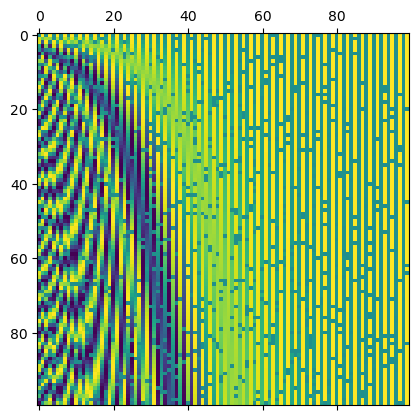

In [5]:
plt.matshow(posx[:, 0, :].numpy())
plt.show()